In [1]:
#importing the relevant python libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

In [2]:
#Loading the tags in terms of ids csv file into a dataframe
tags_df = pd.read_csv('Tags_IDs.csv')
tags_df

,userId,movieId,tag_id
0,2,60756,1
1,62,2953,1
2,62,3114,1
3,62,60756,1
4,62,68848,1
...,...,...,...
3678,606,7382,1456
3679,606,7936,1457
3680,610,3265,1458
3681,610,3265,1459


In [6]:
#Counting the number of times a particular tag is repeated for each movie
#Storing that count value in a separate datframe
tag_count = pd.DataFrame(tags_df.groupby(['movieId','tag_id']).size().reset_index().rename(columns={0:'count'}))
tag_count

,movieId,tag_id,count
0,1,58,2
1,1,1196,1
2,2,31,1
3,2,32,1
4,2,33,1
...,...,...,...
3565,187595,280,1
3566,193565,94,1
3567,193565,157,1
3568,193565,355,1


In [7]:
#Finding total number of times a movie was given a tag and storing it in a separate dataframe
tag_count_sum=pd.DataFrame(tag_count.groupby('movieId').sum()['count'].reset_index().rename(columns={'count':'sum'}))
tag_count_sum

,movieId,sum
0,1,3
1,2,4
2,3,2
3,5,2
4,7,1
...,...,...
1567,183611,3
1568,184471,3
1569,187593,3
1570,187595,2


In [8]:
#Merging the tag count with the the tag count sum dataframe on movieId column
tag_count=pd.merge(tag_count,tag_count_sum,on='movieId')
tag_count

,movieId,tag_id,count,sum
0,1,58,2,3
1,1,1196,1,3
2,2,31,1,4
3,2,32,1,4
4,2,33,1,4
...,...,...,...,...
3565,187595,280,1,2
3566,193565,94,1,4
3567,193565,157,1,4
3568,193565,355,1,4


In [9]:
#Calculating the term frequency for each tag corresponding to each movie
tag_count['tf'] = tag_count['count']/tag_count['sum']
tag_count

,movieId,tag_id,count,sum,tf
0,1,58,2,3,0.666667
1,1,1196,1,3,0.333333
2,2,31,1,4,0.250000
3,2,32,1,4,0.250000
4,2,33,1,4,0.250000
...,...,...,...,...,...
3565,187595,280,1,2,0.500000
3566,193565,94,1,4,0.250000
3567,193565,157,1,4,0.250000
3568,193565,355,1,4,0.250000


In [10]:
#Creating a separate dataframe to calculate the inverse document frequency for each tag
#The idf_denom is basically the total number of occurences of a tag in the entire database
idf = pd.DataFrame(tag_count.groupby('tag_id').count()['movieId'].reset_index().rename(columns={'movieId':'idf_denom'}))
idf

,tag_id,idf_denom
0,1,22
1,2,3
2,3,6
3,4,1
4,5,1
...,...,...
1454,1455,1
1455,1456,1
1456,1457,1
1457,1458,1


In [12]:
#Number of unique movies which were given tags by users
#This value will be the common numerator for each tag's idf value
len(pd.unique(tags_df['movieId']))

1572

In [13]:
#Calculating the idf values for each tag id and storing it in the dataframe
import math

idf['idf_value'] = 0.0

for i in idf.index :
    idf['idf_value'][i] = math.log(1572 / idf['idf_denom'][i])

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
#The updated idf dataframe with idf values
idf

,tag_id,idf_denom,idf_value
0,1,22,4.269062
1,2,3,6.261492
2,3,6,5.568345
3,4,1,7.360104
4,5,1,7.360104
...,...,...,...
1454,1455,1,7.360104
1455,1456,1,7.360104
1456,1457,1,7.360104
1457,1458,1,7.360104


In [15]:
#Merging the idf dataframe with the dataframe containing the tag counts and tf values on tag_id column
tag_count = pd.merge(tag_count, idf, on='tag_id')
tag_count

,movieId,tag_id,count,sum,tf,idf_denom,idf_value
0,1,58,2,3,0.666667,4,5.973810
1,2355,58,1,1,1.000000,4,5.973810
2,3114,58,2,8,0.250000,4,5.973810
3,68954,58,1,13,0.076923,4,5.973810
4,1,1196,1,3,0.333333,5,5.750666
...,...,...,...,...,...,...,...
3565,184471,276,1,3,0.333333,1,7.360104
3566,187593,277,1,3,0.333333,1,7.360104
3567,187595,279,1,2,0.500000,1,7.360104
3568,193565,355,1,4,0.250000,1,7.360104


In [16]:
#Sorting the dataframe on movie ids and then tag ids
tag_count = tag_count.sort_values(['movieId','tag_id'])
tag_count

,movieId,tag_id,count,sum,tf,idf_denom,idf_value
0,1,58,2,3,0.666667,4,5.973810
4,1,1196,1,3,0.333333,5,5.750666
9,2,31,1,4,0.250000,6,5.568345
15,2,32,1,4,0.250000,1,7.360104
16,2,33,1,4,0.250000,3,6.261492
...,...,...,...,...,...,...,...
824,187595,280,1,2,0.500000,2,6.666957
2221,193565,94,1,4,0.250000,12,4.875197
1161,193565,157,1,4,0.250000,19,4.415665
3568,193565,355,1,4,0.250000,1,7.360104


In [17]:
#Calculating the tf-idf values for each movie id and tag id pair
#The tf-idf scores are simply the prodcuct of tf and idf values
tag_count['tf_idf']=tag_count['tf']*tag_count['idf_value']
tag_count

,movieId,tag_id,count,sum,tf,idf_denom,idf_value,tf_idf
0,1,58,2,3,0.666667,4,5.973810,3.982540
4,1,1196,1,3,0.333333,5,5.750666,1.916889
9,2,31,1,4,0.250000,6,5.568345,1.392086
15,2,32,1,4,0.250000,1,7.360104,1.840026
16,2,33,1,4,0.250000,3,6.261492,1.565373
...,...,...,...,...,...,...,...,...
824,187595,280,1,2,0.500000,2,6.666957,3.333478
2221,193565,94,1,4,0.250000,12,4.875197,1.218799
1161,193565,157,1,4,0.250000,19,4.415665,1.103916
3568,193565,355,1,4,0.250000,1,7.360104,1.840026


In [18]:
#Storing just the movieID, tagID, and the tf-idf values in a separate dataframe
relevance_score = pd.DataFrame(tag_count[['movieId','tag_id','tf_idf']])
relevance_score

,movieId,tag_id,tf_idf
0,1,58,3.982540
4,1,1196,1.916889
9,2,31,1.392086
15,2,32,1.840026
16,2,33,1.565373
...,...,...,...
824,187595,280,3.333478
2221,193565,94,1.218799
1161,193565,157,1.103916
3568,193565,355,1.840026


In [19]:
#Creating pivot table of relevance score dataframe and filling NA values with zeros
relevance_mat = relevance_score.pivot_table(index='tag_id',columns='movieId',values='tf_idf')
relevance_mat = relevance_mat.fillna(0,axis=0)
relevance_mat

movieId,1,2,3,5,7,11,14,16,17,21,...,176371,176419,179401,180031,180985,183611,184471,187593,187595,193565
tag_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.067265,0.0,0.0,1.423021,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [20]:
#Finding the coefficients for each movie pair using the Pearson Correlation
corr_mat=relevance_mat.corr(method='pearson')
corr_mat

movieId,1,2,3,5,7,11,14,16,17,21,...,176371,176419,179401,180031,180985,183611,184471,187593,187595,193565
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.001821,-0.001295,-0.001294,-0.000916,-0.001284,-0.001284,-0.000916,-0.000916,-0.000916,...,-0.002566,-0.001587,-0.001780,-0.001283,-0.000916,-0.001534,-0.001568,-0.001576,-0.001294,-0.001787
2,-0.001821,1.000000,-0.001930,-0.001928,-0.001364,-0.001913,-0.001913,-0.001364,-0.001364,-0.001364,...,-0.003822,-0.002364,-0.002651,-0.001911,-0.001364,-0.002285,-0.002336,-0.002347,-0.001928,-0.002663
3,-0.001295,-0.001930,1.000000,-0.001371,-0.000970,-0.001361,-0.001361,-0.000970,-0.000970,-0.000970,...,-0.002719,-0.001682,-0.001886,-0.001360,-0.000970,-0.001625,-0.001662,-0.001670,-0.001371,-0.001894
5,-0.001294,-0.001928,-0.001371,1.000000,0.672059,-0.001359,-0.001359,-0.000969,-0.000969,-0.000969,...,-0.002716,-0.001680,-0.001883,-0.001358,-0.000969,-0.001623,-0.001660,-0.001668,-0.001369,-0.001892
7,-0.000916,-0.001364,-0.000970,0.672059,1.000000,-0.000962,-0.000962,-0.000686,-0.000686,-0.000686,...,-0.001922,-0.001189,-0.001333,-0.000961,-0.000686,-0.001149,-0.001174,-0.001180,-0.000969,-0.001339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183611,-0.001534,-0.002285,-0.001625,-0.001623,-0.001149,-0.001611,-0.001611,-0.001149,-0.001149,-0.001149,...,-0.003219,-0.001991,0.368891,-0.001609,-0.001149,1.000000,-0.001967,-0.001977,-0.001623,0.163324
184471,-0.001568,-0.002336,-0.001662,-0.001660,-0.001174,-0.001647,-0.001647,-0.001174,-0.001174,-0.001174,...,-0.003291,-0.002036,-0.002282,-0.001646,-0.001174,-0.001967,1.000000,-0.002021,-0.001660,-0.002293
187593,-0.001576,-0.002347,-0.001670,-0.001668,-0.001180,-0.001655,-0.001655,-0.001180,-0.001180,-0.001180,...,-0.003307,-0.002046,-0.002293,-0.001654,-0.001180,-0.001977,-0.002021,1.000000,-0.001668,-0.002304


In [21]:
#Creating another pivot table for relevance score but with movieID as index
rel_mat = relevance_score.pivot_table(index='movieId',columns='tag_id',values='tf_idf')
rel_mat = rel_mat.fillna(0,axis=0)
rel_mat

tag_id,1,2,3,4,5,6,7,8,9,10,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183611,1.423021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184471,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187593,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#Adding a dummy column having only 1 for each row
#This is required for creating the zero_one matrix required for calculations
relevance_score['one'] = 1
relevance_score

,movieId,tag_id,tf_idf,one
0,1,58,3.982540,1
4,1,1196,1.916889,1
9,2,31,1.392086,1
15,2,32,1.840026,1
16,2,33,1.565373,1
...,...,...,...,...
824,187595,280,3.333478,1
2221,193565,94,1.218799,1
1161,193565,157,1.103916,1
3568,193565,355,1.840026,1


In [24]:
#Creating the zero_one matrix in the form of a pivot table 
zero_one = relevance_score.pivot_table(index='movieId',columns='tag_id',values='one')
zero_one = zero_one.fillna(0,axis=0)
zero_one

tag_id,1,2,3,4,5,6,7,8,9,10,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183611,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#Creating a matrix with all ones in the form of a pivot table
#This is required to create the actual necessary all one matrix which is of MxM dimension and not TxM
all_one_dummy = relevance_score.pivot_table(index='tag_id',columns='movieId',values='one')
all_one_dummy = all_one_dummy.fillna(1,axis=0)
all_one_dummy

movieId,1,2,3,5,7,11,14,16,17,21,...,176371,176419,179401,180031,180985,183611,184471,187593,187595,193565
tag_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1456,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1457,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [26]:
#Creating the all one MxM matrix in the form of a pivot table
all_one = all_one_dummy.corr(method='pearson')
all_one = all_one.fillna(1,axis=0)
all_one

movieId,1,2,3,5,7,11,14,16,17,21,...,176371,176419,179401,180031,180985,183611,184471,187593,187595,193565
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183611,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
184471,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
187593,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [28]:
#Creating the MxT numerator matrix required for relevance score calculation
numerator = corr_mat.dot(rel_mat)
numerator

tag_id,1,2,3,4,5,6,7,8,9,10,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.288473,-0.001722,-0.017053,-0.003883,-0.003883,-0.007440,-0.019665,-0.016428,-0.008395,-0.001832,...,-0.000846,-0.000846,-0.000846,-0.006740,-0.002362,-0.006740,-0.003795,-0.006740,-0.004762,-0.006460
2,-0.057185,-0.004019,-0.025403,-0.005785,-0.005785,-0.011083,-0.031692,-0.024473,-0.012506,-0.002729,...,-0.001260,-0.001260,-0.001260,-0.010040,-0.003519,-0.010040,-0.005654,-0.010040,-0.007093,-0.009624
3,-0.040675,-0.002859,-0.018069,-0.004115,-0.004115,-0.007883,-0.022542,-0.017407,-0.008896,-0.001941,...,-0.000897,-0.000897,-0.000897,-0.007142,-0.002503,-0.007142,-0.004021,-0.007142,-0.005045,-0.006845
5,-0.040628,-0.002856,-0.018048,-0.004110,-0.004110,-0.007874,-0.022516,-0.017387,0.288343,-0.001939,...,-0.000895,-0.000895,-0.000895,-0.007133,-0.002500,-0.007133,-0.004017,-0.007133,-0.005040,-0.006838
7,-0.028752,-0.002021,-0.012772,-0.002909,-0.002909,-0.005573,-0.015934,-0.012305,0.435644,-0.001372,...,-0.000634,-0.000634,-0.000634,-0.005048,-0.001769,-0.005048,-0.002843,-0.005048,-0.003566,-0.004839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183611,5.912868,0.291165,2.045330,-0.004871,-0.004871,-0.009333,-0.005925,0.016740,-0.010531,-0.002298,...,-0.001061,-0.001061,-0.001061,-0.008454,-0.002963,-0.008454,-0.004761,-0.008454,-0.005973,-0.008104
184471,-0.049234,-0.003460,-0.021872,-0.004981,-0.004981,-0.009542,-0.027286,-0.021071,-0.010768,-0.002350,...,-0.001085,-0.001085,-0.001085,-0.008644,-0.003030,-0.008644,-0.004868,-0.008644,-0.006107,-0.008286
187593,-0.037125,0.014635,-0.021978,-0.005005,-0.005005,-0.009589,-0.011511,-0.021173,-0.010820,-0.002361,...,-0.001090,-0.001090,-0.001090,-0.008686,-0.003045,-0.008686,-0.004891,-0.008686,-0.006137,-0.008326


In [29]:
#Calculating the MxT denominator matrix required for relevance score calculation
denominator = all_one.dot(zero_one)
denominator

tag_id,1,2,3,4,5,6,7,8,9,10,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
movieId,,,,,,,,,,,,,,,,,,,,,
1,22.0,3.0,6.0,1.0,1.0,3.0,9.0,9.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
2,22.0,3.0,6.0,1.0,1.0,3.0,9.0,9.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
3,22.0,3.0,6.0,1.0,1.0,3.0,9.0,9.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
5,22.0,3.0,6.0,1.0,1.0,3.0,9.0,9.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
7,22.0,3.0,6.0,1.0,1.0,3.0,9.0,9.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183611,22.0,3.0,6.0,1.0,1.0,3.0,9.0,9.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
184471,22.0,3.0,6.0,1.0,1.0,3.0,9.0,9.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
187593,22.0,3.0,6.0,1.0,1.0,3.0,9.0,9.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0


In [30]:
#Calculating the relevance score for each movie and tag pair including the ones which were missing
relMat_dense = numerator / denominator
relMat_dense

tag_id,1,2,3,4,5,6,7,8,9,10,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.013112,-0.000574,-0.002842,-0.003883,-0.003883,-0.002480,-0.002185,-0.001825,-0.002099,-0.001832,...,-0.000846,-0.000846,-0.000846,-0.006740,-0.002362,-0.006740,-0.003795,-0.006740,-0.004762,-0.003230
2,-0.002599,-0.001340,-0.004234,-0.005785,-0.005785,-0.003694,-0.003521,-0.002719,-0.003127,-0.002729,...,-0.001260,-0.001260,-0.001260,-0.010040,-0.003519,-0.010040,-0.005654,-0.010040,-0.007093,-0.004812
3,-0.001849,-0.000953,-0.003012,-0.004115,-0.004115,-0.002628,-0.002505,-0.001934,-0.002224,-0.001941,...,-0.000897,-0.000897,-0.000897,-0.007142,-0.002503,-0.007142,-0.004021,-0.007142,-0.005045,-0.003423
5,-0.001847,-0.000952,-0.003008,-0.004110,-0.004110,-0.002625,-0.002502,-0.001932,0.072086,-0.001939,...,-0.000895,-0.000895,-0.000895,-0.007133,-0.002500,-0.007133,-0.004017,-0.007133,-0.005040,-0.003419
7,-0.001307,-0.000674,-0.002129,-0.002909,-0.002909,-0.001858,-0.001770,-0.001367,0.108911,-0.001372,...,-0.000634,-0.000634,-0.000634,-0.005048,-0.001769,-0.005048,-0.002843,-0.005048,-0.003566,-0.002419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183611,0.268767,0.097055,0.340888,-0.004871,-0.004871,-0.003111,-0.000658,0.001860,-0.002633,-0.002298,...,-0.001061,-0.001061,-0.001061,-0.008454,-0.002963,-0.008454,-0.004761,-0.008454,-0.005973,-0.004052
184471,-0.002238,-0.001153,-0.003645,-0.004981,-0.004981,-0.003181,-0.003032,-0.002341,-0.002692,-0.002350,...,-0.001085,-0.001085,-0.001085,-0.008644,-0.003030,-0.008644,-0.004868,-0.008644,-0.006107,-0.004143
187593,-0.001687,0.004878,-0.003663,-0.005005,-0.005005,-0.003196,-0.001279,-0.002353,-0.002705,-0.002361,...,-0.001090,-0.001090,-0.001090,-0.008686,-0.003045,-0.008686,-0.004891,-0.008686,-0.006137,-0.004163


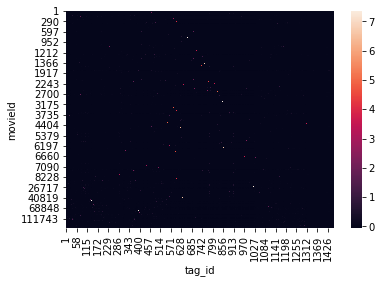

In [31]:
#A heatmap of the relevance score values
sns.heatmap(relMat_dense)

In [33]:
#Reshaping the dense relevance score pivot table into the tabular structure
relMat_dense_dataframe = pd.DataFrame(relMat_dense.to_records())
relMat_dense_dataframe = pd.melt(relMat_dense_dataframe, id_vars=['movieId'], var_name = 'tag_id', value_name='relevance_score')
relMat_dense_dataframe

,movieId,tag_id,relevance_score
0,1,1,0.013112
1,2,1,-0.002599
2,3,1,-0.001849
3,5,1,-0.001847
4,7,1,-0.001307
...,...,...,...
2293543,183611,1459,-0.004052
2293544,184471,1459,-0.004143
2293545,187593,1459,-0.004163
2293546,187595,1459,-0.003419


In [34]:
#Normalizing the relevance scores
relMat_dense_dataframe['scores_normal'] = relMat_dense_dataframe['relevance_score'] / relMat_dense_dataframe['relevance_score'].abs().max()
relMat_dense_dataframe

,movieId,tag_id,relevance_score,scores_normal
0,1,1,0.013112,0.001782
1,2,1,-0.002599,-0.000353
2,3,1,-0.001849,-0.000251
3,5,1,-0.001847,-0.000251
4,7,1,-0.001307,-0.000178
...,...,...,...,...
2293543,183611,1459,-0.004052,-0.000551
2293544,184471,1459,-0.004143,-0.000563
2293545,187593,1459,-0.004163,-0.000566
2293546,187595,1459,-0.003419,-0.000464


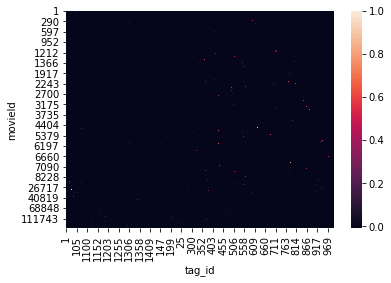

In [35]:
#A heatmap of the normalized relevance scores
sns.heatmap(relMat_dense_dataframe.pivot_table(index='movieId', columns='tag_id', values='scores_normal'))

In [36]:
#Scaling the normalized scores so that they range from 0 to 1
relMat_dense_dataframe['scores_final'] = (relMat_dense_dataframe['scores_normal'] + 1 )/2
relMat_dense_dataframe

,movieId,tag_id,relevance_score,scores_normal,scores_final
0,1,1,0.013112,0.001782,0.500891
1,2,1,-0.002599,-0.000353,0.499823
2,3,1,-0.001849,-0.000251,0.499874
3,5,1,-0.001847,-0.000251,0.499875
4,7,1,-0.001307,-0.000178,0.499911
...,...,...,...,...,...
2293543,183611,1459,-0.004052,-0.000551,0.499725
2293544,184471,1459,-0.004143,-0.000563,0.499719
2293545,187593,1459,-0.004163,-0.000566,0.499717
2293546,187595,1459,-0.003419,-0.000464,0.499768


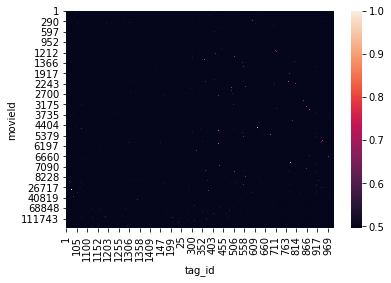

In [37]:
#A heatmap of the finally scaled relevance scores 
sns.heatmap(relMat_dense_dataframe.pivot_table(index='movieId', columns='tag_id', values='scores_final'))

In [38]:
#Creating a separate dataframe to store only the final scaled relevance scores
genome_score = pd.DataFrame(relMat_dense_dataframe[['movieId','tag_id','scores_final']])
genome_score.columns = ['movieId','tag_id','relevance']
genome_score

,movieId,tag_id,relevance
0,1,1,0.500891
1,2,1,0.499823
2,3,1,0.499874
3,5,1,0.499875
4,7,1,0.499911
...,...,...,...
2293543,183611,1459,0.499725
2293544,184471,1459,0.499719
2293545,187593,1459,0.499717
2293546,187595,1459,0.499768


In [39]:
#Storing the relevance score dataframe into a csv file
genome_score.to_csv('Genome-scores.csv',index=False)